Saving images.jpeg to images.jpeg


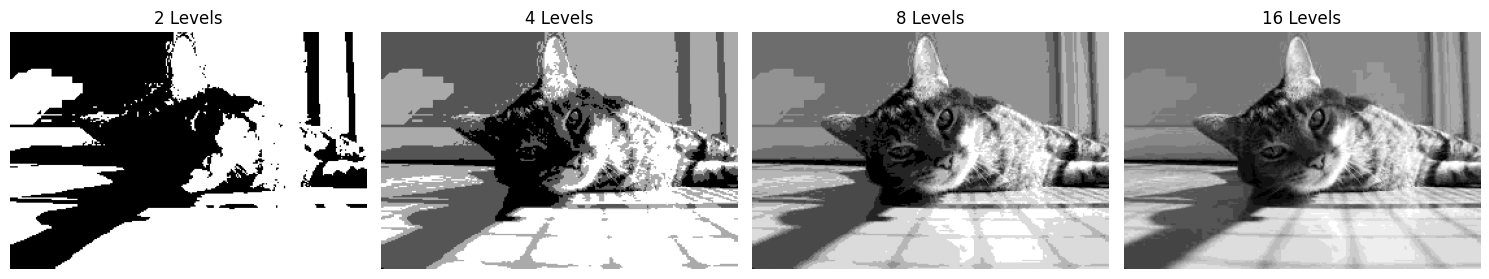

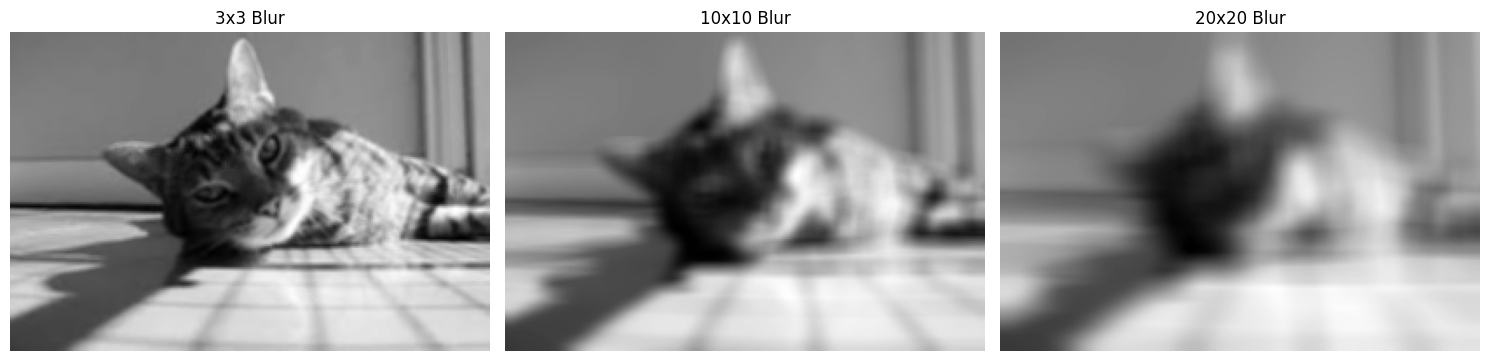

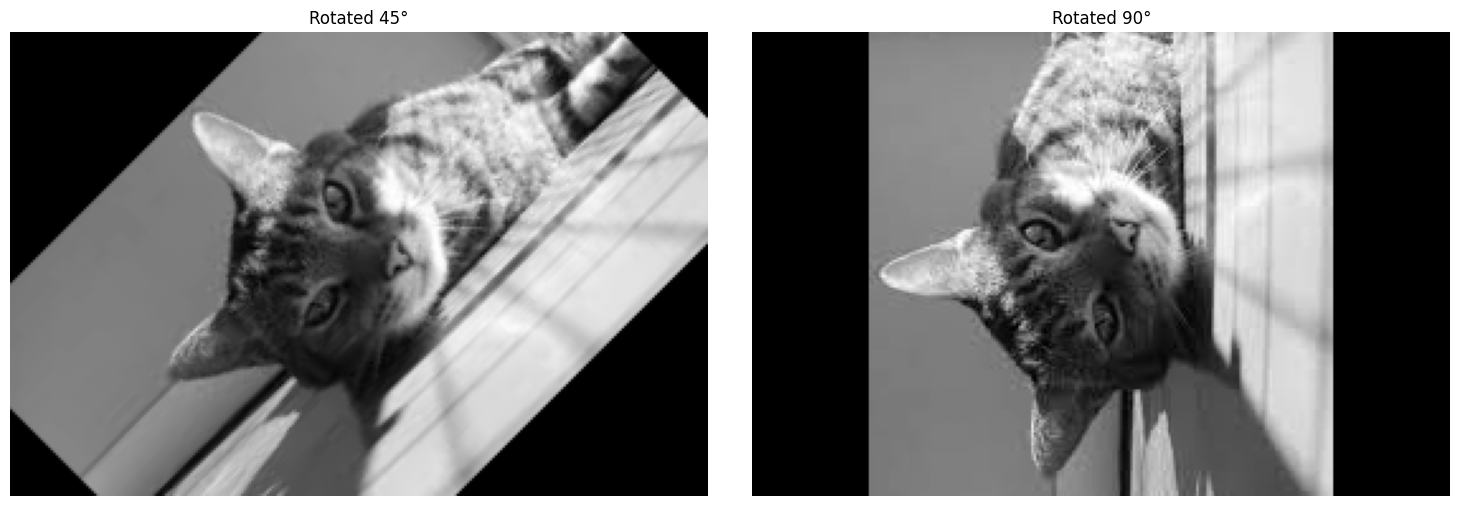

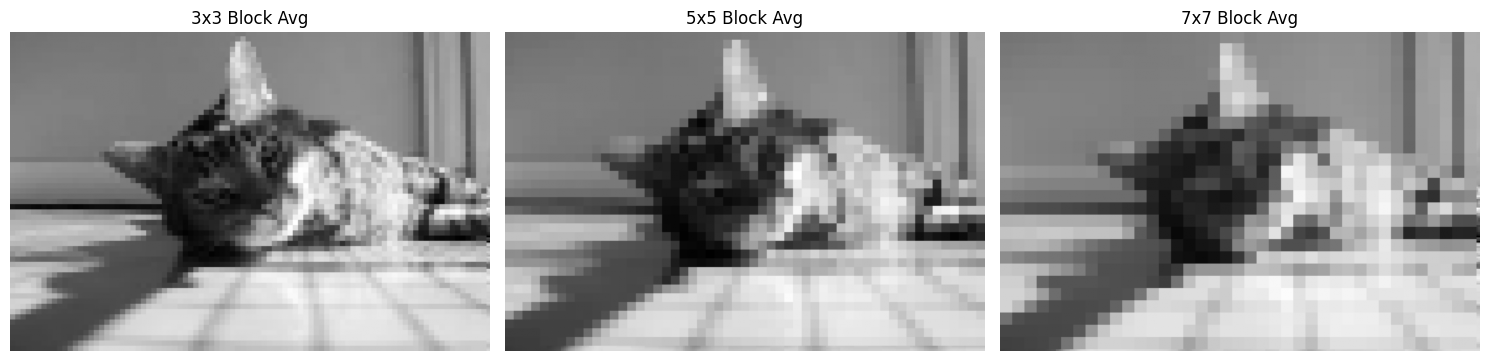

In [ ]:
#EG/2020/4353

!pip install opencv-python-headless

# Upload Image
from google.colab import files
uploaded = files.upload()  # Upload a grayscale image

import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load uploaded image
import io
import PIL.Image

image_path = next(iter(uploaded))
img = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

if img is None:
    raise ValueError("Image not loaded correctly. Please upload a valid image.")

# Show images
def show_images(images, titles, cmap='gray'):
    plt.figure(figsize=(15, 5))
    for i in range(len(images)):
        plt.subplot(1, len(images), i+1)
        plt.imshow(images[i], cmap=cmap)
        plt.title(titles[i])
        plt.axis('off')
    plt.tight_layout()
    plt.show()

# Reduce Intensity Levels
def reduce_intensity(image, levels):
    step = 256 // levels
    reduced = (image // step) * step
    return reduced.astype(np.uint8)

levels = [2, 4, 8, 16]
reduced_images = [reduce_intensity(img, l) for l in levels]
show_images(reduced_images, [f"{l} Levels" for l in levels])

# Spatial Averaging (Blurring)
def average_filter(image, ksize):
    return cv2.blur(image, (ksize, ksize))

blurred3 = average_filter(img, 3)
blurred10 = average_filter(img, 10)
blurred20 = average_filter(img, 20)

show_images([blurred3, blurred10, blurred20], ["3x3 Blur", "10x10 Blur", "20x20 Blur"])

# Image Rotation
def rotate_image(image, angle):
    h, w = image.shape[:2]
    center = (w // 2, h // 2)
    rot_matrix = cv2.getRotationMatrix2D(center, angle, 1.0)
    rotated = cv2.warpAffine(image, rot_matrix, (w, h), flags=cv2.INTER_LINEAR)
    return rotated

rot45 = rotate_image(img, 45)
rot90 = rotate_image(img, 90)

show_images([rot45, rot90], ["Rotated 45°", "Rotated 90°"])

# Block Averaging (Resolution Reduction)
def block_average(image, block_size):
    h, w = image.shape
    output = image.copy()
    for i in range(0, h - block_size + 1, block_size):
        for j in range(0, w - block_size + 1, block_size):
            block = image[i:i+block_size, j:j+block_size]
            avg = np.mean(block).astype(np.uint8)
            output[i:i+block_size, j:j+block_size] = avg
    return output

block3 = block_average(img, 3)
block5 = block_average(img, 5)
block7 = block_average(img, 7)

show_images([block3, block5, block7], ["3x3 Block Avg", "5x5 Block Avg", "7x7 Block Avg"])


Loaded default image successfully.


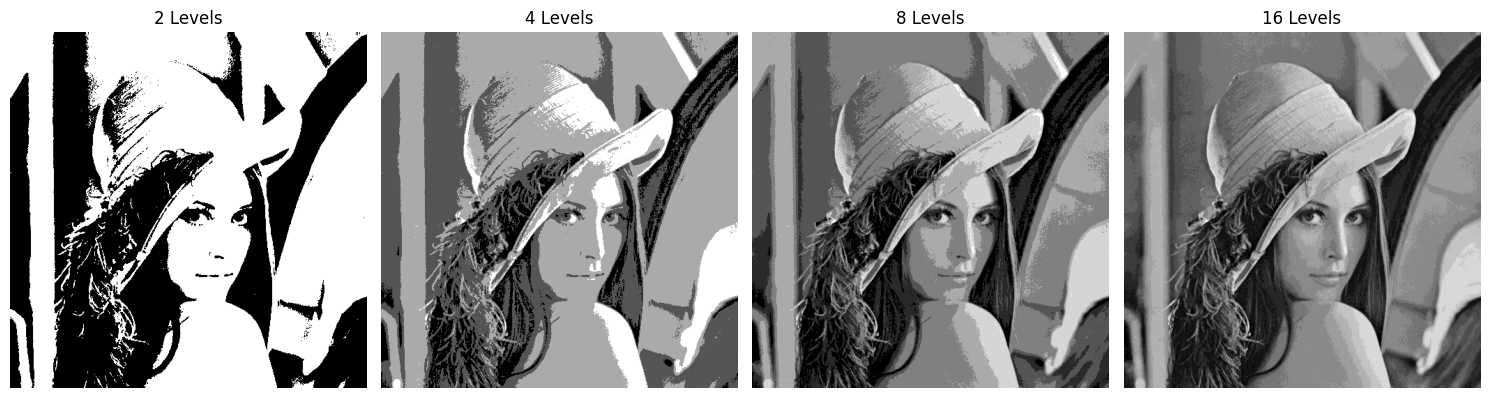

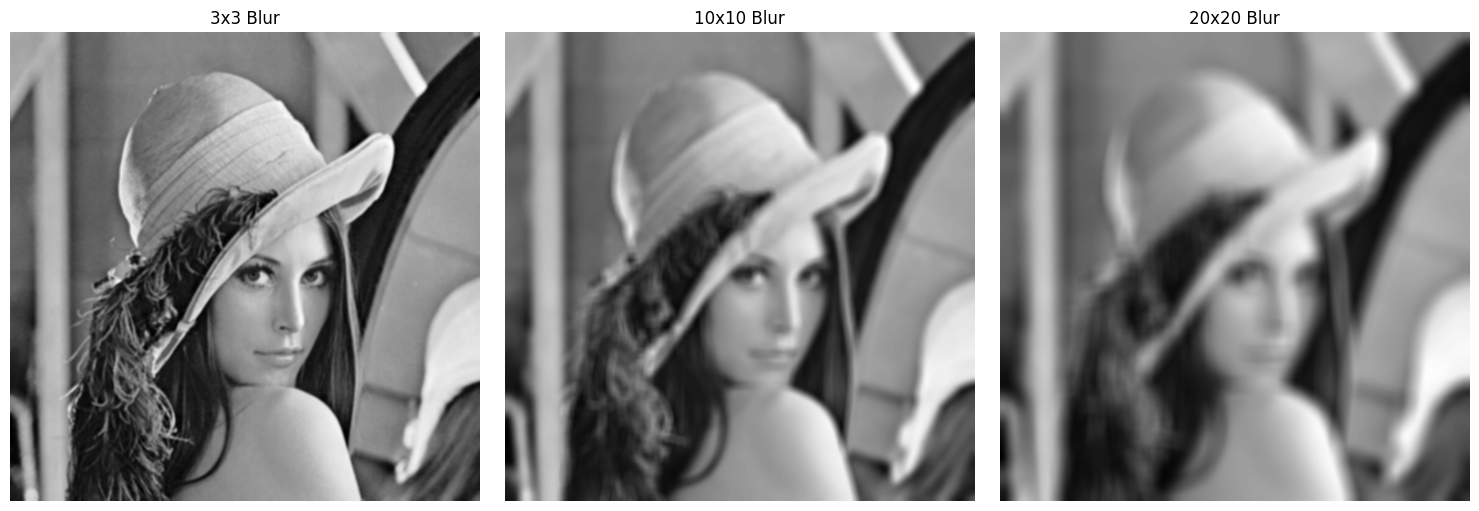

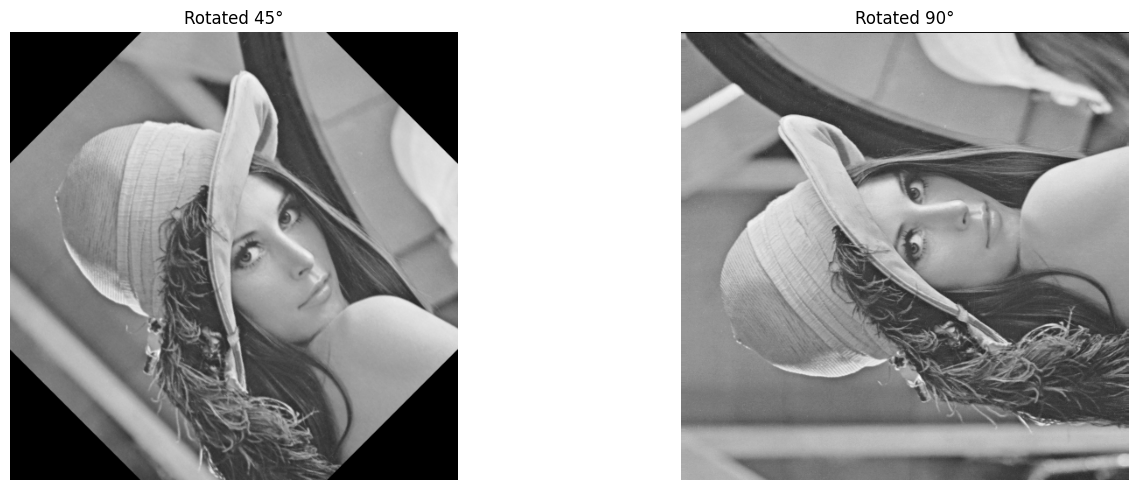

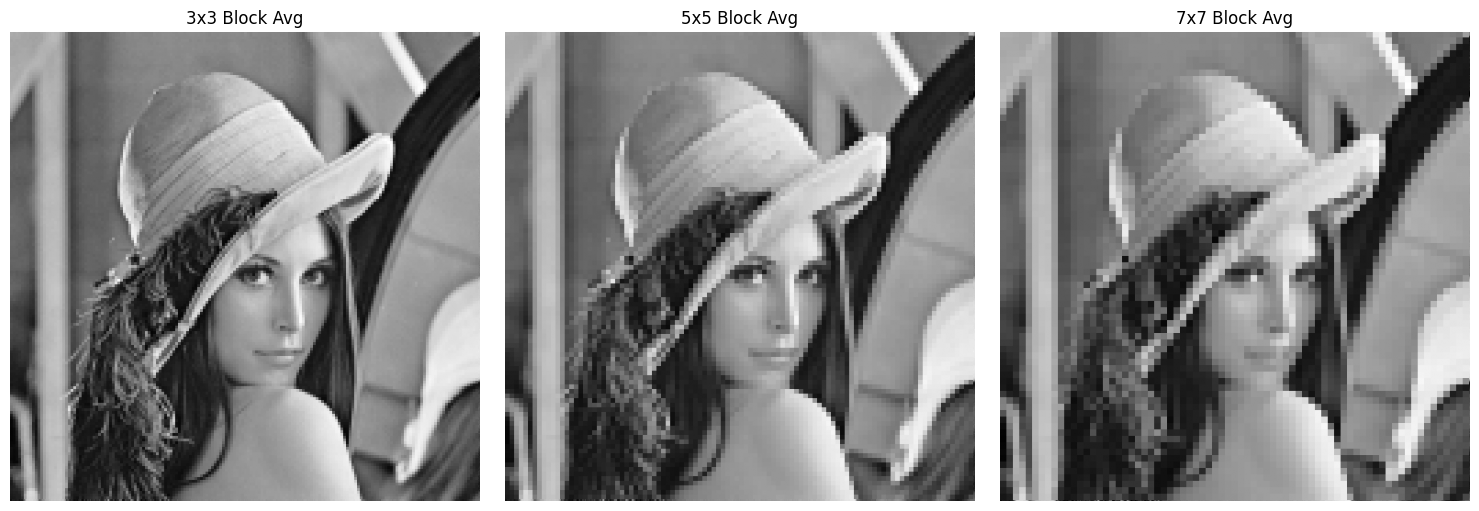

In [ ]:
# EC7212 – Computer Vision and Image Processing
# Take Home Assignment 1
# EG/2020/4353

!pip install opencv-python-headless

import cv2
import numpy as np
import matplotlib.pyplot as plt
import os
from google.colab import files

# Show the images
def show_images(images, titles, cmap='gray'):
    plt.figure(figsize=(15, 5))
    for i in range(len(images)):
        plt.subplot(1, len(images), i+1)
        plt.imshow(images[i], cmap=cmap)
        plt.title(titles[i])
        plt.axis('off')
    plt.tight_layout()
    plt.show()

# Try Loading Default Image
default_image_url = 'https://upload.wikimedia.org/wikipedia/en/7/7d/Lenna_%28test_image%29.png'
default_image_path = 'default_image.png'

try:
    # Download the image using wget
    if not os.path.exists(default_image_path):
        !wget -q {default_image_url} -O {default_image_path}

    img = cv2.imread(default_image_path, cv2.IMREAD_GRAYSCALE)
    if img is None:
        raise Exception("Default image failed to load.")
    print("Loaded default image successfully.")

except Exception as e:
    print("Default image failed. Please upload an image manually.")
    uploaded = files.upload()
    image_path = next(iter(uploaded))
    img = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE) # Convert to grayscale
    if img is None:
        raise ValueError("Image not loaded correctly. Please upload a valid image.")

# Reduce Intensity Levels
def reduce_intensity(image, levels):
    step = 256 // levels
    reduced = (image // step) * step
    return reduced.astype(np.uint8)

levels = [2, 4, 8, 16]
reduced_images = [reduce_intensity(img, l) for l in levels]
show_images(reduced_images, [f"{l} Levels" for l in levels])

# Spatial Averaging (Blurring)
def average_filter(image, ksize):
    return cv2.blur(image, (ksize, ksize))

blurred3 = average_filter(img, 3)
blurred10 = average_filter(img, 10)
blurred20 = average_filter(img, 20)

show_images([blurred3, blurred10, blurred20], ["3x3 Blur", "10x10 Blur", "20x20 Blur"])

# Image Rotation
def rotate_image(image, angle):
    h, w = image.shape[:2]
    center = (w // 2, h // 2)
    rot_matrix = cv2.getRotationMatrix2D(center, angle, 1.0)
    rotated = cv2.warpAffine(image, rot_matrix, (w, h), flags=cv2.INTER_LINEAR)
    return rotated

rot45 = rotate_image(img, 45)
rot90 = rotate_image(img, 90)

show_images([rot45, rot90], ["Rotated 45°", "Rotated 90°"])

# Block Averaging (Resolution Reduction)
def block_average(image, block_size):
    h, w = image.shape
    output = image.copy()
    for i in range(0, h - block_size + 1, block_size):
        for j in range(0, w - block_size + 1, block_size):
            block = image[i:i+block_size, j:j+block_size]
            avg = np.mean(block).astype(np.uint8)
            output[i:i+block_size, j:j+block_size] = avg
    return output

block3 = block_average(img, 3)
block5 = block_average(img, 5)
block7 = block_average(img, 7)

show_images([block3, block5, block7], ["3x3 Block Avg", "5x5 Block Avg", "7x7 Block Avg"])
